
# Que pasa si la serie no es estacionaria:
## Como se remueve la no estacionarieidad.

Hay dos parametros importantes en este curso: la media y la varianza. La media se pude "corregir" con el operador diferencia y la varianza con funciones. Por ejemplo log, sqrt, etc.

En este curso solo corregimos por media (la varianza queda por fuera).

Vamos a estudiar el operador diferencia. Para remover la media.





## Diferenciacion.
Si el "trend" (tendencia) de los datos es lineal, por ejemplo $y=f(x)=cx + b $

Claramente

$$ y' = \frac{dy}{dx} = c$$
De esta forma tomando la derivada removemos el "trend".
Numericamente:

$$ D_1 = y'(x) \approx \frac{f(x+\Delta x)- f(x)}{\Delta x}  $$

Podemos asumir que $\Delta x = 1$ y veamos que esta formula produce exactamente $c$.

$$ f(x+\Delta x) - f(x) = c( x + \Delta x) + b - cx - b = c x + c \Delta x + b - cx - b=c$$
pues $\Delta x = 1$.

El operador $D_1$ es la diferencia $\Delta x = 1$.

Si la tendencia es cuadratica necesitamos tomar o una segunda derivada o otra mas sobre la primera.

Dos formas
* Aplicar otra diferenciacion sobre $y'=df/dx$.
* Aplicar directamente una segunda derivada sobre $y$

$$y'' = \frac{f(x+\Delta x) -2 f(x) + f(x-\Delta x)}{(\Delta x)^2} $$
Igual para series de tiempo pensemos que $\Delta x=1$. $X_t, X_{t-1}, X_{t-2}, \cdots $.

$$ D_2 = f(x + \Delta x) - 2 f(x) + f(x- \Delta x) $$

Asumamos que la tendencia es $y=a x^2 + bx + c$

\begin{eqnarray}
 D_2[y] &=& a (x + \Delta x)^2 + b (x + \Delta x) + c - 2[ a x^2 + bx + c] + a(x - \Delta x)^2 + b(x + \Delta x) + c  \\
 &=& a (x + 1)^2 + b(x+1) + c - 2 a x^2 - 2 bx - 2 c + a (x-1)^2 + b(x+1) + c  \\
 &=& a x^2 + 2 a x + a + bx + b + c - 2 a x^2 - 2 bx - 2c + a x^2 - 2 a x + a + bx + b + c \\
 &=& 2a 
 \end{eqnarray}

 Observamos que la segunda diferencia elimina por completo la tendencia y queda una serie de tiempo constante.

 Podemos usar el operator backshift de la siguiente forma.

 Tenemos:

 * $D_1= X_t = X_t - X_{t-1}= (1 - B)X_t$
 * $D_2 = X_{t-1} - 2 X_t + X_{t+1} $
 Como es esto en terminos del backshift ?.

 En general podemos aplicar diferencias de orden $k$
 de la siguiente forma

 $$ D_{ki} (X_t) = (1 - B)^k X_{t+i} $$

 El indice $k$ indica el numero de diferencias que se utilizan. La potencia del diferenciador. El indice $i$ indica la muestra "pivote".

 Un ejemplo:

 \begin{eqnarray}
 (1 - B) X_t &=&X_t - X_{t-1} \\
 (1 -B) X_{t+1} &=& X_{t+1} - X_t
\end{eqnarray}

En el primer caso de arriba $t=1,2,3, \cdots$.
en el segundo caso $t=0,1,2, \cdots $.

Las producen las diferencias pero hay efectos de borde. Por ejemplo en la primera pierdo la primera muestra, en la segunda pierdo la ultima muestra. 

La idea es que el indice $1 < 1 <k$ va limitar el tamno de la salida y va a crear un efecto de borde a izquierda o derecha.

(lo vemos en Python mas adelante).

## Recobro de la senala luego de aplicar operadores diferencias.

$$ W_t = D_1 X_t = X_t - X_{t-1} \implies X_t = W_t + X_{t-1}  $$

Con las segundas diferencias

$$ W_t =D_2 X_t = X_{t-1} - 2 X_t + X_{t+1} \implies X_{t+1} = W_t + 2 X_t - X_{t-1} $$



# remocion de la tendencia con primeras y segundas diferencias
# Tendencia lineal


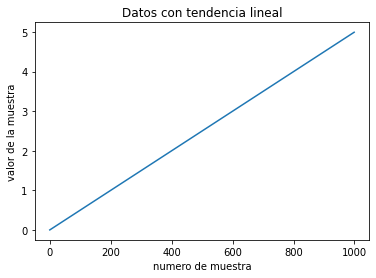

In [82]:
# creamos una serie de tiempo con tendencia lineal (sin ruido y con ruido)
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
mu, sigma=0,1
N=1000
Z=np.random.normal(mu, sigma, N)

a=0.5  # pendiente, cien veces mas pequena que esto. 0.005

W = np.zeros(N)
for i in range(N):
    W[i] = a*i/100

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia lineal")
plt.plot(W)
plt.show();



## constuirmos el operador diferencias

In [83]:
def diff(X, o, interval=1):
    n = len(X)
    Y = np.zeros(n)

    print("o=",o)

    if o==1 :  # primeras diferencias
        for i in range(interval, n):
            Y[i] = X[i] - X[i-1]
    elif o==2 :  # segundas diferencias
        for i in range(interval, n-interval):
            Y[i] = X[i+interval]-2*X[i] + X[i-interval]
    else:
        print("error. Solo o=1,2 son posibles")
        return

    return Y






o= 1


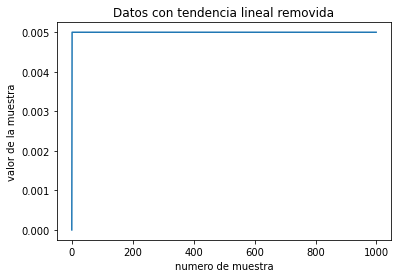

In [84]:
Y= diff(W, 1)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia lineal removida")
plt.plot(Y)
plt.show();


### Metamosle ruido

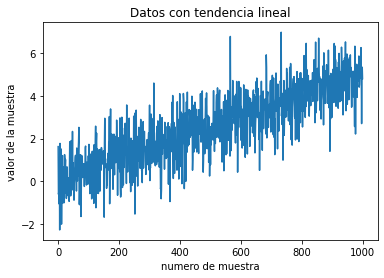

In [85]:
W = np.zeros(N)

for i in range(N):
    W[i] = Z[i] + a*i/100

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia lineal")
plt.plot(W)
plt.show();



o= 1


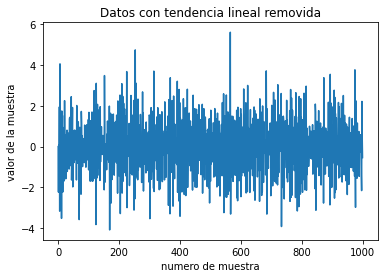

In [86]:
Y= diff(W, 1)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia lineal removida")
plt.plot(Y)
plt.show();


In [87]:
X2 = Y[:-1]
X2.mean()
# a/100

0.003723248311531132

## tendencia cuadratica
### sin ruido

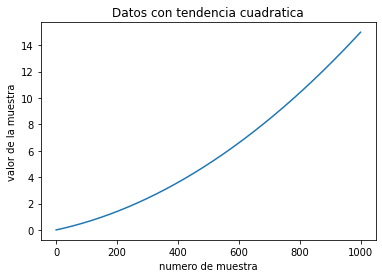

In [88]:
a=0.5
b=0.1

W2=np.zeros(N)

for i in range(N):
    W2[i] = a*i/100 + b*i**2/10000

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia cuadratica")
plt.plot(W2)
plt.show();


o= 1


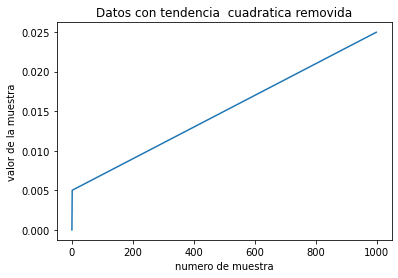

In [89]:
Y1= diff(W2, 1)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia  cuadratica removida")
plt.plot(Y1)
plt.show();


o= 2


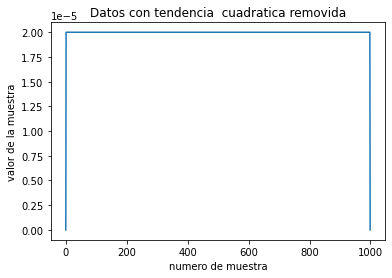

In [90]:
Y2= diff(W2, 2)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia  cuadratica removida")
plt.plot(Y2)
plt.show();


### con ruido


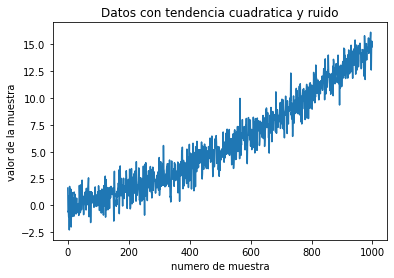

In [91]:
W2 = np.zeros(N)
for i in range(N):
    W2[i] = Z[i] + a*i/100 + b*i**2/10000


plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia cuadratica y ruido")
plt.plot(W2)
plt.show();



o= 1
o= 2


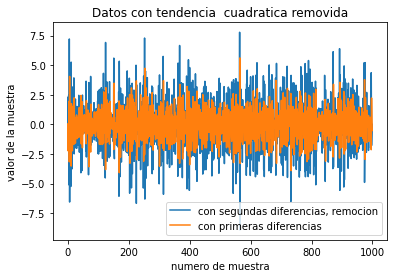

media con primeras diferencias 0.013163709619804006
media con segundas diferencias 0.00171523633389773


In [92]:
Y21= diff(W2, 1)
Y2= diff(W2,2)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con tendencia  cuadratica removida")
plt.plot(Y2, label='con segundas diferencias, remocion')
# plt.plot(W2, label='datos originales')
plt.plot(Y21, label='con primeras diferencias')
plt.legend()
plt.show();

print("media con primeras diferencias", Y21.mean())
print("media con segundas diferencias", Y2.mean())




In [93]:
# media del ruido
Z.mean()

0.03881247615960185

In [94]:
np.random.seed(1)
mu, sigma=0,1
N=1000
Z=np.random.normal(mu, sigma, N)
Z.mean()

0.03881247615960185

### Recuperacion

In [95]:
# del operador D1
N=1000
W = np.zeros(N)
for i in range(N):
    W[i] = Z[i]+ a*i/100

Y1 = diff(W,1)

# X son datos recobrados
X=np.zeros(N)

X[0]=W[0]
for i in range(1,N):
    X[i] = Y1[i]+X[i-1]

# el error maximo despues de recuperar
print("error maximo", max(abs(X-W)))

o= 1
error maximo 2.220446049250313e-15


## Recuperacion de cuadratica con ruido

In [96]:
W=np.zeros(N)
for i in range(N):
    W[i] = Z[i] + a*i/100 + b*i**2/10000

Y1 = diff(W,2)

# X son datos recobrados
X = np.zeros(N)

# los bordes ayudan a recuperar
X[0]=W[0]
X[1]=W[1]
interval=1
for i in range(interval, N-interval):
    X[i+1] = Y1[i] + 2*X[i] - X[i-1]

# QC: Quality Control
print("error maximo", max(abs(X-W)))


o= 2
error maximo 1.1857181902996672e-11


## Seasoning: (estaciones)
En ocaciones las series de tiempo estan separadas por trimestres (quarters). La tendencia del "seasoning" se puede remover con las mismas funciones que ya definimos solo que cambia el "inverval"

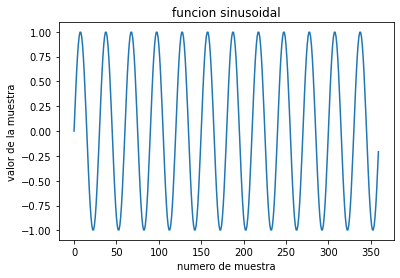

In [97]:
freq=12

# creamos datos con periodo
X = [np.sin(np.radians(freq*i)) for i in range(360)]

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("funcion sinusoidal")
plt.plot(X)



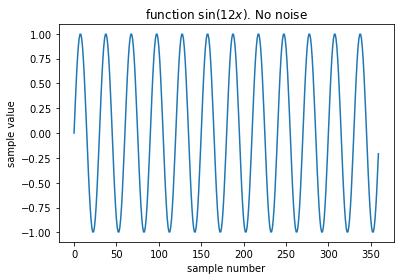

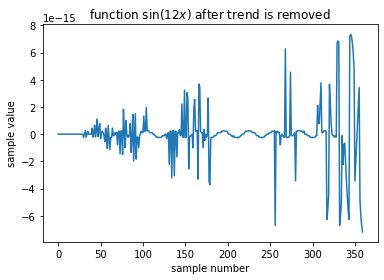

In [98]:
import numpy as np
import matplotlib.pyplot as plt
 

# only orders of diff are o=1,2
def diff(X,o, interval=1):
    n = len(X)
    Y = np.zeros(n)
    if o==1 :
        for i in range(interval,n):
            Y[i]=X[i]-X[i-interval]
    elif o==2:
        for i in range(interval,n-interval):
            Y[i]=X[i+interval]- 2*X[i] + X[i-interval]
    else :
        print("error. Only o=1,2 are valid")
        return
    
    return Y


freq=12
# a dataset with seasonality
X =  [np.sin(np.radians(freq*i)) for i in range(360)]

plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("function $\sin(12 x)$. No noise")
plt.plot(X)
plt.show();
# difference the dataset
Y = diff(X, 1, 30)  # observe that 12*30=360
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("function $\sin(12 x)$ after trend is removed")
plt.plot(Y)
plt.show();


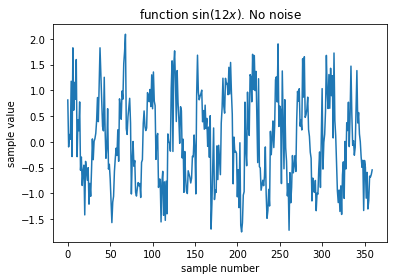

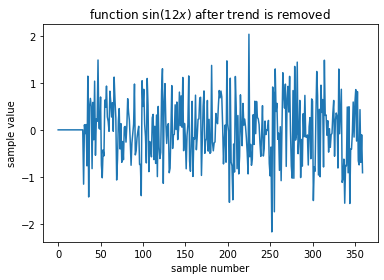

In [115]:
# con ruido
np.random.seed(1)
mu, sigma = 0, 0.5
N=len(X)
Z=np.random.normal(mu, sigma, N)
X =  Z +  [np.sin(np.radians(freq*i)) for i in range(360)] 



plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("function $\sin(12 x)$. No noise")
plt.plot(X)
plt.show();
# difference the dataset
Y = diff(X, 1, 30)  # observe that 12*30=360
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("function $\sin(12 x)$ after trend is removed")
plt.plot(Y)
plt.show();




In [110]:
Y.mean()

-0.008021996071531267

In [111]:
Z.mean()

0.028945199108581402

In [112]:
H = Y[30:]
H.mean()



-0.008751268441670476

## Recobrar



In [117]:
mu, sigma = 0, 0.5
N=len(X)
Z=np.random.normal(mu,sigma,N)

freq=12
# a dataset with seasonality
X =  [np.sin(np.radians(freq*i)) for i in range(360)] + Z


In [118]:
# # XR son los datos recuperados
# XR = np.zeros(N)

# for i in range(interval):
#     XR[i]=X[i]
# for i in range(interval, N):
#     XR[i] = Y[i] + XR[i-interval]

# # maximo error
# print("max error", max( abs(X-XR)))


# XR the recovered data
XR = np.zeros(N)

# the first "interval" samples are lost and need to be recovered
# from the original data
for i in range(interval):
    XR[i]=X[i]
for i in range(interval,N):
    XR[i] = Y[i] + XR[i-interval]
    
# the maximum error is
print("maximum error :", max( abs(X-XR)))


maximum error : 7.391441245459076


# Moving Average: 
Introduccion

Tenemos unos datos:

$$35, 33, 31, 32, 45, 46, 41, 30, 32, 41 $$
Se puede sacar un "running (moving) average" de estos datos 

Al hacer el "moving average" (promedio mobil)

--, --, 33, 32, 36, 45, 46, 41, 30, 32, 41


| Stock Price | 3 day movng average |
| ---- | :---:|
| 35 | - |
| 33 | - |
| 31 | 33 | 
| 32 | 32 | 



Ejemplo en Python de como el MA sirve para **suavizar** funciones



In [136]:
# creo una serie de tiempo con ruido y la suavizo (smoothing)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(1)
mu, sigma = 0, 1.0
N=400
Z=np.random.normal(mu, sigma , N)

a=0.5
b=0.8

X = np.zeros(N)
for i in range(N):
    X[i] = Z[i] + a*i/100 + b*i**2/10000

df = pd.DataFrame(X)


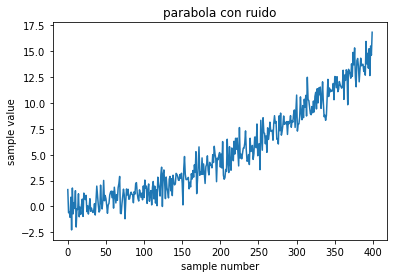

In [137]:
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("parabola con ruido")
plt.plot(X)
plt.show();

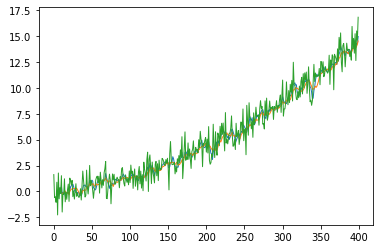

In [138]:
# creamos distintos MA con dataframe
df2 = df.rolling(window=5).mean()
df3 = df.rolling(window=10).mean()
plt.plot(df2, label='window 5 smoothing', linewidth=1.0)
plt.plot(df3, label='window 10 smoothing', linewidth=1.0)
plt.plot(df, label='datos originales', linewidth=1.0)





El MA en series de tiempo funciona de la siguiente forma

$$X_t = \beta_0 Z_t + \beta_1 Z_{t-1}  + \beta_2 Z_{t-2} + \cdots +  \beta_q Z_{t-q} + c $$

A esto se le llama un Moving Average de orden q
MA(q)

### Media y Varianza del MA(q)
La media del ruido y todos sus desplazamientos (lags) es 0

$$\mu_{X_t} = \sum_{i=0}^q \beta_i \overline{Z_{t-i}} + c= c $$

La varianza

$$ \mathbb{V}[ X_t] = \sum_{i=0}^q \beta_i^2 \mathbb{V}[Z_t] = 
\sigma_Z^2 \sum \beta_i^2  $$
donde $\sigma_Z^2$ es la varianza de $Z_t$ y todos sus "lags"



Funciones de AutoCorrelacion ACF para MA(q).

